# Mineria de Texto

##### Integrantes: 
##### - Harold Aquino Curisinche 
##### - Rosa Estrada Estrada
##### Descripción: Aplicación de minería de texto a los reclamos de SUSALUD

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np

##### Manejo de Texto

In [2]:
import re
import string

In [3]:
%pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

##### Analisis de frecuencia de palabras

In [5]:
from collections import Counter

##### Procesamiento del Lenguaje Natural (NLP)

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.util import bigrams

##### Representación Vectorial de Texto

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [26]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [28]:
%pip install spacy

Note: you may need to restart the kernel to use updated packages.


##### Análisis de Sentimiento y Texto

In [8]:
from textblob import TextBlob

#####  Procesamiento Avanzado de Texto

In [9]:
import spacy

##### Descargar recursos de NLTK

In [10]:
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harol\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
!python -m spacy download es_core_news_md

     ---------------------------------------- 0.0/42.3 MB ? eta -:--:--
     - -------------------------------------- 1.8/42.3 MB 8.4 MB/s eta 0:00:05
     --- ------------------------------------ 3.7/42.3 MB 9.1 MB/s eta 0:00:05
     ----- ---------------------------------- 5.8/42.3 MB 9.0 MB/s eta 0:00:05
     ------- -------------------------------- 7.6/42.3 MB 9.0 MB/s eta 0:00:04
     -------- ------------------------------- 9.4/42.3 MB 9.3 MB/s eta 0:00:04
     ---------- ----------------------------- 11.3/42.3 MB 9.0 MB/s eta 0:00:04
     ------------ --------------------------- 13.1/42.3 MB 9.1 MB/s eta 0:00:04
     ------------- -------------------------- 14.7/42.3 MB 8.9 MB/s eta 0:00:04
     --------------- ------------------------ 16.0/42.3 MB 8.7 MB/s eta 0:00:04
     ----------------- ---------------------- 18.1/42.3 MB 8.7 MB/s eta 0:00:03
     ----------------- ---------------------- 18.6/42.3 MB 8.8 MB/s eta 0:00:03
     ----------------- ---------------------- 18.6/42

In [11]:
# Modelo de NLP en español
nlp = spacy.load("es_core_news_md")

In [12]:
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2)

# Cargar datos y seleccionar campo de texto

In [15]:
df = pd.read_csv("../data/processed/reclamos_descripciones.csv")

#### Columna donde se encuentra el motivo del reclamo

In [16]:
# Seleccionar la columna de texto relevante
df_text = df[["CO_UNICO_RECLAMO", "DESCRIPCION"]].dropna()
df_text.rename(columns={"DESCRIPCION": "texto"}, inplace=True)

In [17]:
print("Ejemplo de texto:\n", df_text["texto"].sample(5))

Ejemplo de texto:
 11246     En la IAFAS no se cumplen los tiempos de atenc...
107855    El seguro negó la servicio de mi servicio de s...
150119    No me permitieron elegir un IPRESS diferente a...
126257    Se me ha cobrado un monto adicional por un ser...
108683    Nunca recibí detalles sobre los derechos que m...
Name: texto, dtype: object


#  Preprocesamiento del texto

In [18]:
# Función para limpiar texto
def limpiar_texto(texto):
    texto = texto.lower() 
    texto = re.sub(r'\d+', '', texto)
    texto = texto.translate(str.maketrans('', '', string.punctuation))
    #Tokenizacion
    tokens = word_tokenize(texto)
    tokens = [word for word in tokens if word not in stopwords.words("spanish")]
    # Lematización
    tokens = [WordNetLemmatizer().lemmatize(word) for word in tokens]  
    return " ".join(tokens)

#### Aplicacion de la funcion

In [19]:
df_text["texto_limpio"] = df_text["texto"].apply(limpiar_texto)

In [20]:
print("Ejemplo de texto limpio:\n", df_text["texto_limpio"].sample(5))

Ejemplo de texto limpio:
 46137    coordinación hospital policlínico derivar caso...
68121          cobrado monto adicional servicio solicitado
62136         acceso ipress elegido bloqueado razón alguna
4167     policlínico zona cuenta traumatólogo pese ser ...
32258    repudiandae voluptatum non fugiat voluptates c...
Name: texto_limpio, dtype: object


#  Frecuencia de palabras

In [21]:
# Se une todo el texto tratado
texto_completo = " ".join(df_text["texto_limpio"])

In [22]:
# Contar palabras más comunes
palabras = texto_completo.split()
frecuencia = Counter(palabras).most_common(20)

#### Grafico de las palabras mas comunes

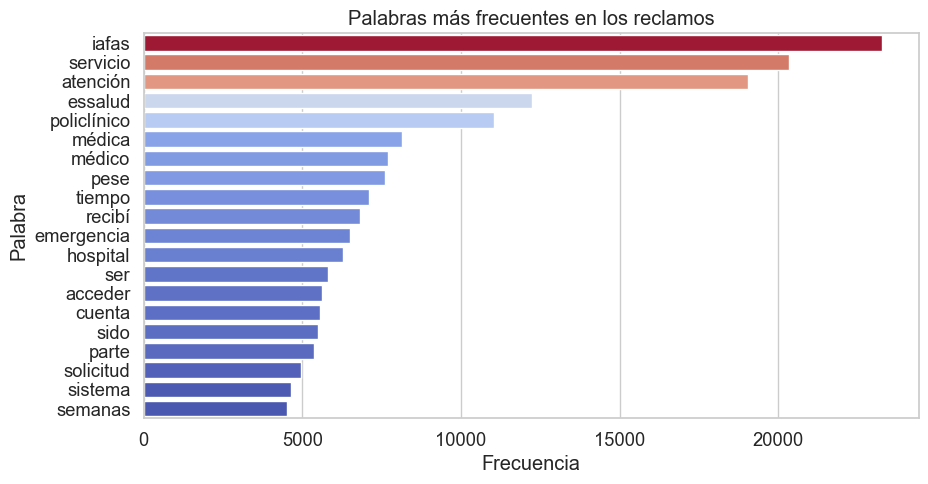

In [23]:
plt.figure(figsize=(10, 5))
sns.barplot(x=[x[1] for x in frecuencia], y=[x[0] for x in frecuencia], hue=[x[1] for x in frecuencia], palette="coolwarm", legend=False)
plt.title("Palabras más frecuentes en los reclamos")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

# Nube de palabras

In [24]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_completo)

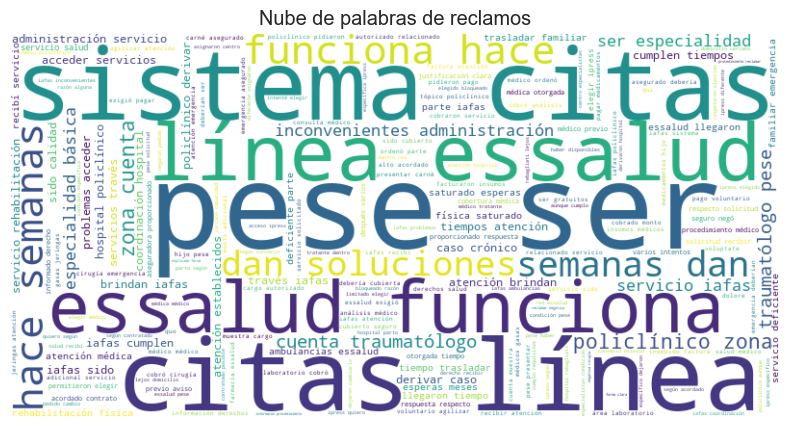

In [25]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nube de palabras de reclamos")
plt.show()

# Analisis de sentimientos

In [26]:
# Función de análisis de sentimiento
def obtener_sentimiento(texto):
    analisis = TextBlob(texto)
    return analisis.sentiment.polarity

#### Aplicacion del analisis

In [27]:
df_text["sentimiento"] = df_text["texto_limpio"].apply(obtener_sentimiento)

##### Distribucion del sentimiento en reclamos

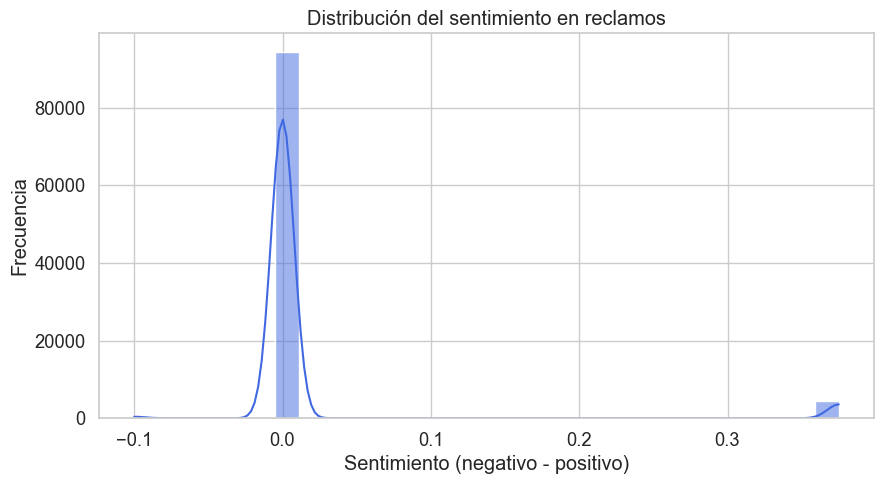

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df_text["sentimiento"], bins=30, kde=True, color="royalblue")
plt.title("Distribución del sentimiento en reclamos")
plt.xlabel("Sentimiento (negativo - positivo)")
plt.ylabel("Frecuencia")
plt.show()

# Modelado de temas con LDA (Latent Dirichlet Allocation)

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

In [30]:
# Obtener stopwords en español
stop_words_spanish = stopwords.words('spanish')

In [31]:
# Vectorización de texto
vectorizer = CountVectorizer(max_features=500, stop_words=stop_words_spanish)
X = vectorizer.fit_transform(df_text["texto_limpio"])

In [32]:
# Modelo LDA con 5 temas
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [33]:
# Mostrar palabras clave por tema
palabras = vectorizer.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Tema {i+1}: ", [palabras[i] for i in topic.argsort()[-10:]])

Tema 1:  ['zona', 'traumatólogo', 'básica', 'especialidad', 'caso', 'hospital', 'cuenta', 'pese', 'ser', 'policlínico']
Tema 2:  ['informado', 'seguro', 'servicio', 'médica', 'calidad', 'brindan', 'médico', 'iafas', 'sido', 'atención']
Tema 3:  ['varios', 'otorgada', 'después', 'médica', 'esperas', 'física', 'rehabilitación', 'saturado', 'meses', 'servicio']
Tema 4:  ['tiempos', 'través', 'servicios', 'establecidos', 'problemas', 'acceder', 'servicio', 'atención', 'recibí', 'iafas']
Tema 5:  ['soluciones', 'funciona', 'citas', 'dan', 'semanas', 'sistema', 'servicio', 'tiempo', 'emergencia', 'essalud']


############

# Vector TF IDF

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [36]:
import pickle

In [37]:
# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_text['texto_limpio'])

In [38]:
# Entrenamiento de Word2Vec
sentences = [text.split() for text in df_text['texto_limpio']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [39]:
# Entrenamiento de FastText
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [40]:
# Función para convertir texto en vectores usando Word2Vec/FastText
def text_to_vector(model, text):
    words = text.split()
    vector = np.mean([model.wv[word] for word in words if word in model.wv] or [np.zeros(100)], axis=0)
    return vector

In [41]:
df_text['categoria'] = df['DE_CLASIF_1']

In [42]:
print("\nCategorías únicas:")
print(df_text['categoria'].value_counts())


Categorías únicas:
categoria
Otros relativos a las IAFAS                                                         44090
Negar la acreditación de usuario asegurado.                                         10605
Cobrar indebidamente                                                                10594
Negar o demora en otorgar la cobertura en salud                                      9103
No permitir al usuario la libre elección de IPRESS de acuerdo a lo contratado        8409
No brindar información sobre sus derechos en salud                                   5986
Demorar la gestión de la carta de garantía y/o reembolsos.                           5274
Negar o demorar en la atención en la IAFAS                                           2028
Negar atención para el trámite de registro o acreditación                             945
No brindar atención con respeto de parte del personal de la IAFAS                     619
Negar la cobertura en periodo de latencia                             

In [43]:
# Aplicar limpieza de texto
df_text['texto_procesado'] = df_text['texto'].apply(limpiar_texto)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
# Codificar categorías
label_encoder = LabelEncoder()
df_text['categoria_encoded'] = label_encoder.fit_transform(df_text['categoria'])

In [48]:
# Vectorización con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_text['texto_procesado'])

In [49]:
# Entrenamiento de Word2Vec y FastText
sentences = [text.split() for text in df_text['texto_procesado']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
fasttext_model = FastText(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [50]:
# Función para convertir texto en vectores
def text_to_vector(model, text):
    words = text.split()
    vector = np.mean([model.wv[word] for word in words if word in model.wv] or [np.zeros(100)], axis=0)
    return vector

In [51]:
# Aplicar Word2Vec y FastText
df_text['word2vec_vector'] = df_text['texto_procesado'].apply(lambda x: text_to_vector(word2vec_model, x))
df_text['fasttext_vector'] = df_text['texto_procesado'].apply(lambda x: text_to_vector(fasttext_model, x))

In [52]:
# División en conjunto de entrenamiento y prueba
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df_text['categoria_encoded'], test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(list(df_text['word2vec_vector']), df_text['categoria_encoded'], test_size=0.2, random_state=42)
X_train_ft, X_test_ft, _, _ = train_test_split(list(df_text['fasttext_vector']), df_text['categoria_encoded'], test_size=0.2, random_state=42)

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
# Aplicar SMOTE para balancear clases en TF-IDF
smote = SMOTE(random_state=42)
X_train_tfidf_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

In [62]:
# Función para entrenar y evaluar modelos
def train_and_evaluate(model, X_train, X_test, name):
    model.fit(X_train, y_train_resampled)
    y_pred = model.predict(X_test)
    
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=1),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=1),
        "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=1)
    }
    
    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred, zero_division=1))
    
    # Guardar el modelo
    pickle.dump(model, open(f"../modelos/{name}.pkl", "wb"))
    
    return metrics

In [63]:
# Revisar distribución de clases
print("Distribución en entrenamiento:")
print(np.bincount(y_train))

print("\nDistribución en prueba:")
print(np.bincount(y_test))

# Verificar codificación de categorías
print("Mapeo de categorías:")
for i, categoria in enumerate(label_encoder.classes_):
    print(f"{i}: {categoria}")

# Modelos de clasificación
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "MLP": MLPClassifier()
}

Distribución en entrenamiento:
[ 8488  4181   757   191  8485   242    40   481  7257  1620   506    15
  4799    39   387  6774 35234]

Distribución en prueba:
[2106 1093  188   47 2120   62    7   91 1846  408  113    4 1187    7
  104 1635 8856]
Mapeo de categorías:
0: Cobrar indebidamente
1: Demorar la gestión de la carta de garantía y/o reembolsos.
2: Negar atención para el trámite de registro o acreditación
3: Negar el otorgamiento de prestaciones económicas o sociales
4: Negar la acreditación de usuario asegurado.
5: Negar la afiliación del usuario
6: Negar la cobertura de emergencia en periodo de carencia
7: Negar la cobertura en periodo de latencia
8: Negar o demora en otorgar la cobertura en salud
9: Negar o demorar en la atención en la IAFAS
10: No brindar atención con respeto de parte del personal de la IAFAS
11: No brindar atención según la ley de atención preferencial y de discapacidad
12: No brindar información sobre sus derechos en salud
13: No cumplir con la disposició

In [64]:
results = {}
for name, model in models.items():
    results[f"{name}_tfidf"] = train_and_evaluate(model, X_train_tfidf_resampled, X_test_tfidf, f"{name.lower()}_tfidf")
    results[f"{name}_w2v"] = train_and_evaluate(model, X_train_w2v, X_test_w2v, f"{name.lower()}_w2v")
    results[f"{name}_ft"] = train_and_evaluate(model, X_train_ft, X_test_ft, f"{name.lower()}_ft")


Resultados para logistic regression_tfidf:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2106
           1       0.35      0.51      0.42      1093
           2       1.00      1.00      1.00       188
           3       1.00      1.00      1.00        47
           4       0.67      0.52      0.59      2120
           5       1.00      1.00      1.00        62
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        91
           8       1.00      1.00      1.00      1846
           9       1.00      1.00      1.00       408
          10       1.00      1.00      1.00       113
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00      1187
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00       104
          15       1.00      1.00      1.00      1635
          16       1.00      1.00    

ValueError: Found input variables with inconsistent numbers of samples: [79496, 598978]

In [131]:
# Aplicar Word2Vec y FastText a los textos
df_text['word2vec_vector'] = df_text['texto_limpio'].apply(lambda x: text_to_vector(word2vec_model, x))
df_text['fasttext_vector'] = df_text['texto_limpio'].apply(lambda x: text_to_vector(fasttext_model, x))

In [151]:
# División en conjunto de entrenamiento y prueba
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df_text['categoria'], test_size=0.2, random_state=42)
X_train_w2v, X_test_w2v, _, _ = train_test_split(list(df_text['word2vec_vector']), df_text['categoria'], test_size=0.2, random_state=42)
X_train_ft, X_test_ft, _, _ = train_test_split(list(df_text['fasttext_vector']), df_text['categoria'], test_size=0.2, random_state=42)

In [135]:
from sklearn.preprocessing import LabelEncoder

# 2. Crear y ajustar el codificador de etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df_text['categoria'])

# 3. Modificar la función train_and_evaluate
def train_and_evaluate(model, X_train, X_test, name):
    # Codificar las etiquetas de entrenamiento y prueba
    y_train_encoded = label_encoder.transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    # Entrenar y predecir
    model.fit(X_train, y_train_encoded)
    y_pred_encoded = model.predict(X_test)
    
    # Decodificar las predicciones para el reporte
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'),
        "Recall": recall_score(y_test, y_pred, average='weighted'),
        "F1 Score": f1_score(y_test, y_pred, average='weighted')
    }
    
    print(f"\nResultados para {name}:")
    print(classification_report(y_test, y_pred))
    
    # Guardar el modelo
    pickle.dump(model, open(f"../modelos/{name}.pkl", "wb"))
    # Guardar también el label_encoder
    pickle.dump(label_encoder, open(f"../modelos/{name}_encoder.pkl", "wb"))
    
    return metrics

# 4. Verificar la codificación
print("Mapeo de categorías:")
for i, categoria in enumerate(label_encoder.classes_):
    print(f"{i}: {categoria}")

Mapeo de categorías:
0: -
1: Cobrar indebidamente
2: Demorar la gestión de la carta de garantía y/o reembolsos.
3: Negar  o demora en otorgar la cobertura en salud
4: Negar atención para el trámite de registro o acreditación
5: Negar el otorgamiento de prestaciones económicas o sociales
6: Negar la acreditación de usuario asegurado.
7: Negar la afiliación del usuario
8: Negar la cobertura de emergencia en periodo de carencia
9: Negar la cobertura en periodo de latencia
10: Negar o demorar en la atención en la IAFAS
11: No brindar atención con respeto de parte del personal de la IAFAS
12: No brindar atención según la ley de atención preferencial y de discapacidad
13: No brindar información sobre sus derechos en salud
14: No cumplir con la disposición de libro de reclamaciones en salud
15: No cumplir con las disposiciones de la PAUS de acuerdo a la normatividad vigente
16: No permitir al usuario la libre elección de IPRESS de acuerdo a lo contratado
17: Otros relativos a las IAFAS


In [137]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "MLP": MLPClassifier()
}

results = {}

In [139]:
for name, model in models.items():
    results[f"{name}_tfidf"] = train_and_evaluate(model, X_train_tfidf, X_test_tfidf, f"{name.lower()}_tfidf")
    results[f"{name}_w2v"] = train_and_evaluate(model, X_train_w2v, X_test_w2v, f"{name.lower()}_w2v")
    results[f"{name}_ft"] = train_and_evaluate(model, X_train_ft, X_test_ft, f"{name.lower()}_ft")

C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados para logistic regression_tfidf:


C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                               -       1.00      1.00      1.00     12640
                                                            Cobrar indebidamente       1.00      1.00      1.00      2107
                      Demorar la gestión de la carta de garantía y/o reembolsos.       1.00      1.00      1.00      1030
                                Negar  o demora en otorgar la cobertura en salud       1.00      1.00      1.00      1859
                       Negar atención para el trámite de registro o acreditación       1.00      1.00      1.00       196
                     Negar el otorgamiento de prestaciones económicas o sociales       1.00      1.00      1.00        49
                                     Negar la acreditación de usuario asegurado.       1.00      1.00      1.00      2173
                       

C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados para logistic regression_w2v:


C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                               -       1.00      1.00      1.00     12640
                                                            Cobrar indebidamente       1.00      1.00      1.00      2107
                      Demorar la gestión de la carta de garantía y/o reembolsos.       1.00      1.00      1.00      1030
                                Negar  o demora en otorgar la cobertura en salud       1.00      1.00      1.00      1859
                       Negar atención para el trámite de registro o acreditación       1.00      1.00      1.00       196
                     Negar el otorgamiento de prestaciones económicas o sociales       1.00      1.00      1.00        49
                                     Negar la acreditación de usuario asegurado.       1.00      1.00      1.00      2173
                       

C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Resultados para logistic regression_ft:


C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\harol\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                                                  precision    recall  f1-score   support

                                                                               -       1.00      1.00      1.00     12640
                                                            Cobrar indebidamente       1.00      1.00      1.00      2107
                      Demorar la gestión de la carta de garantía y/o reembolsos.       1.00      1.00      1.00      1030
                                Negar  o demora en otorgar la cobertura en salud       1.00      1.00      1.00      1859
                       Negar atención para el trámite de registro o acreditación       1.00      1.00      1.00       196
                     Negar el otorgamiento de prestaciones económicas o sociales       1.00      1.00      1.00        49
                                     Negar la acreditación de usuario asegurado.       1.00      1.00      1.00      2173
                       

In [140]:
# Guardar modelos y transformaciones
pickle.dump(tfidf_vectorizer, open("../modelos/tfidf_vectorizer.pkl", "wb"))
pickle.dump(word2vec_model, open("../modelos/word2vec_model.pkl", "wb"))
pickle.dump(fasttext_model, open("../modelos/fasttext_model.pkl", "wb"))

In [143]:
# Crear DataFrame de resultados y visualizar-
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,Accuracy,Precision,Recall,F1 Score
Logistic Regression_tfidf,0.999846,0.999693,0.999846,0.999769
Logistic Regression_w2v,0.999539,0.999107,0.999539,0.999316
Logistic Regression_ft,0.999693,0.999412,0.999693,0.999546
Random Forest_tfidf,1.000000,1.000000,1.000000,1.000000
Random Forest_w2v,1.000000,1.000000,1.000000,1.000000
Random Forest_ft,1.000000,1.000000,1.000000,1.000000
XGBoost_tfidf,1.000000,1.000000,1.000000,1.000000
XGBoost_w2v,1.000000,1.000000,1.000000,1.000000
XGBoost_ft,1.000000,1.000000,1.000000,1.000000
MLP_tfidf,1.000000,1.000000,1.000000,1.000000


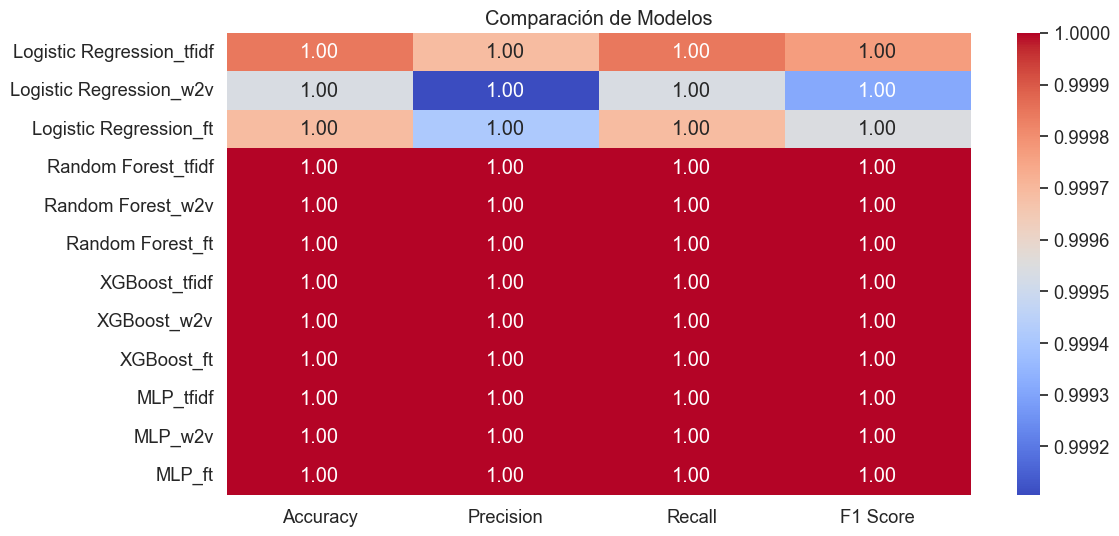

In [145]:
# Visualización de resultados
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Comparación de Modelos")
plt.show()

Valores exactos en el DataFrame:
                           Accuracy  Precision  Recall  F1 Score
Logistic Regression_tfidf    0.9998     0.9997  0.9998    0.9998
Logistic Regression_w2v      0.9995     0.9991  0.9995    0.9993
Logistic Regression_ft       0.9997     0.9994  0.9997    0.9995
Random Forest_tfidf          1.0000     1.0000  1.0000    1.0000
Random Forest_w2v            1.0000     1.0000  1.0000    1.0000
Random Forest_ft             1.0000     1.0000  1.0000    1.0000
XGBoost_tfidf                1.0000     1.0000  1.0000    1.0000
XGBoost_w2v                  1.0000     1.0000  1.0000    1.0000
XGBoost_ft                   1.0000     1.0000  1.0000    1.0000
MLP_tfidf                    1.0000     1.0000  1.0000    1.0000
MLP_w2v                      1.0000     1.0000  1.0000    1.0000
MLP_ft                       1.0000     1.0000  1.0000    1.0000


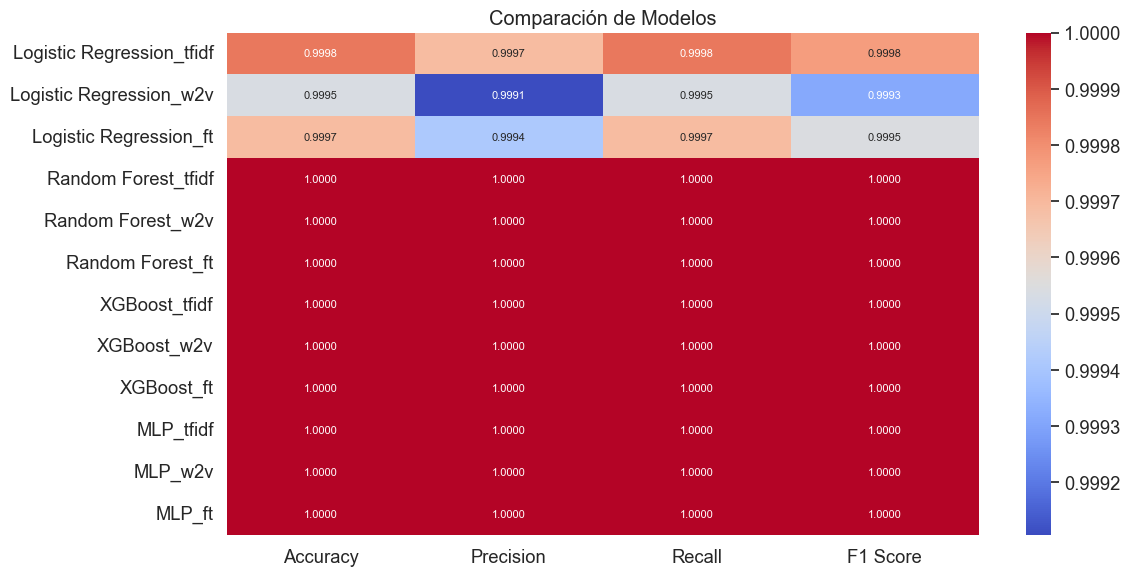

In [120]:
# Configurar el formato de visualización de pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Crear DataFrame de resultados y visualizar con más precisión
results_df = pd.DataFrame.from_dict(results, orient='index')

# Verificar los valores exactos
print("Valores exactos en el DataFrame:")
print(results_df)

# Crear visualización con valores precisos
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, 
            annot=True, 
            cmap="coolwarm", 
            fmt=".4f",  # Mostrar 4 decimales
            annot_kws={'size': 8})  # Ajustar tamaño del texto
plt.title("Comparación de Modelos")
plt.tight_layout()
plt.show()